# How to extract labels from json file and include them into the database

This file walks you through the pipeline of extracting the start and stop times of labels, which indicate at which time points in the movie a label has its onset and where it ends again. 

The time points are in play time (PTS), which represents the movie time.

The data then has to be stored in a certain folder (with a certain naming) so the database can directly read in the data and the table can be filled automatically.

In [3]:
import json
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("/home/tamara/Documents/PhD/DeepHumanVision_deploy")
from database.db_setup import *

import annotation.stimulus_driven_annotation.movies.processing_labels as processing_labels
import preprocessing.data_preprocessing.create_vectors_from_time_points as create_vectors_from_time_points
import database.config as config

## Set parameters

In [4]:
path_to_json_file = "/home/tamara/Documents/PhD/advene"
name_json_file = "500days_of_summer_abspann_vorspann.json"
label_name = "abspann"

path_save_file = "/home/tamara/Documents/DeepHumanVision_pilot/movie_annotation/useful_data/start_end_times/"
name_save_file = "start_stop_times_complete_{}_20200420.npy".format(label_name)

## Extract start stop times from json file

In [5]:
values, start_times, stop_times = processing_labels.start_stop_values_from_json("{}/{}".format(path_to_json_file, name_json_file), label_name)

In [6]:
label = processing_labels.make_label_from_start_stop_times(values, start_times, stop_times, config.PTS_MOVIE_new)

In [7]:
values_complete, starts_complete, stops_complete = create_vectors_from_time_points.get_start_stop_times_from_label(config.PTS_MOVIE_new, label)

## Save start and stop times

The start and stop times need to be stored in the corresponding folder, form where the data base reads in the files

The naming of the files has to be of the certain format:

labelID_labelName_annotatorDI_annotationDate_category.npy

In [7]:
# np.save("{}{}".format(path_save_file, name_save_file), np.array([values_complete, starts_complete, stops_complete]))

## Check label created from start stop times 

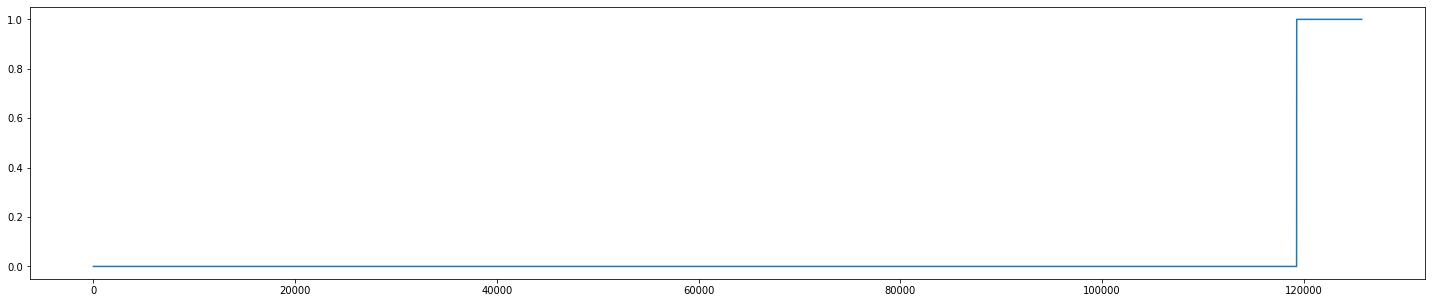

In [8]:
label2 = processing_labels.make_label_from_start_stop_times(values_complete, starts_complete, stops_complete, config.PTS_MOVIE_new)
plt.figure(figsize=(25,5))
plt.plot(label2)

### Fill table with MovieAnnotations in database

In [11]:
#MovieAnnotation.populate()

In [9]:
MovieAnnotation()

annotator_id unique ID for each annotator,label_name label name,annotation_date date of annotation,values list of values that represent label,start_times list of start times of label segments in movie play time (PTS),stop_times list of stop times of label segments in movie play time (PTS),"category categoy of label; e.g. 'character', 'emotion', 'location'","indicator_function full indicator function, one value for each movie frame",additional_information space for additional information
p1,paul,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p1,rachel,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p1,tom,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p2,mckenzie,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,
p2,summer,2020-04-20,=BLOB=,=BLOB=,=BLOB=,character,=BLOB=,


## Patient Aligned Labels

The patient aligned labels are labels aligned to the watch log of the patient, since patients skipped through the movie. They depend on the default labels. The table PatientAlignedMovieAnnotation can therefore be filled automatically. 

To refill patient aligned labels table: uncomment and execute the next line

In [13]:
#PatientAlignedMovieAnnotation.populate()

In [10]:
PatientAlignedMovieAnnotation()

annotator_id unique ID for each annotator,label_name label name,annotation_date date of annotation,session_nr session ID,patient_id patient ID,label_in_patient_time label matched to patient time (pts),values list of values that represent label,start_times list of start times of label segments in neural recording time,stop_times list of stop times of label segments in neural recording time,additionl_information
p1,paul,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p1,rachel,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p1,tom,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p2,mckenzie,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,
p2,summer,2020-04-20,1,60,=BLOB=,=BLOB=,=BLOB=,=BLOB=,


As an example, here we show how to extract a patient aligned label from the database

In [11]:
summer_60 = (PatientAlignedMovieAnnotation() & "patient_id=60" & "label_name='summer'").fetch("label_in_patient_time")[0]
values, start, stop = (PatientAlignedMovieAnnotation() & "patient_id=60" & "label_name='summer'").fetch("values", "start_times", "stop_times")

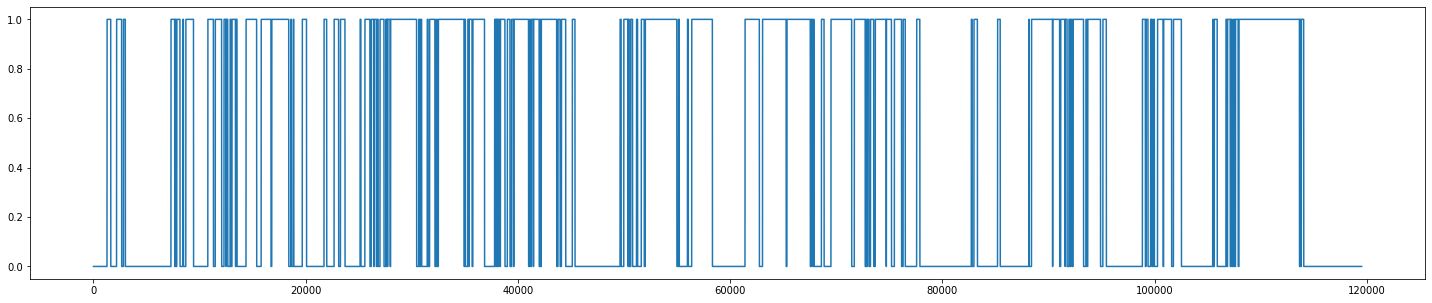

In [12]:
plt.figure(figsize=(25,5))
plt.plot(summer_60)